In [17]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('yeast.csv')

In [3]:
df.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


In [4]:
df.describe()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,0.500121,0.499933,0.500034,0.261186,0.504717,0.007500,0.499885,0.276199
std,0.137299,0.123924,0.086670,0.137098,0.048351,0.075683,0.057797,0.106491
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


In [23]:
#Analisando nosso target: "name"
df['name'].value_counts()

name
CYT    463
NUC    429
MIT    244
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: count, dtype: int64

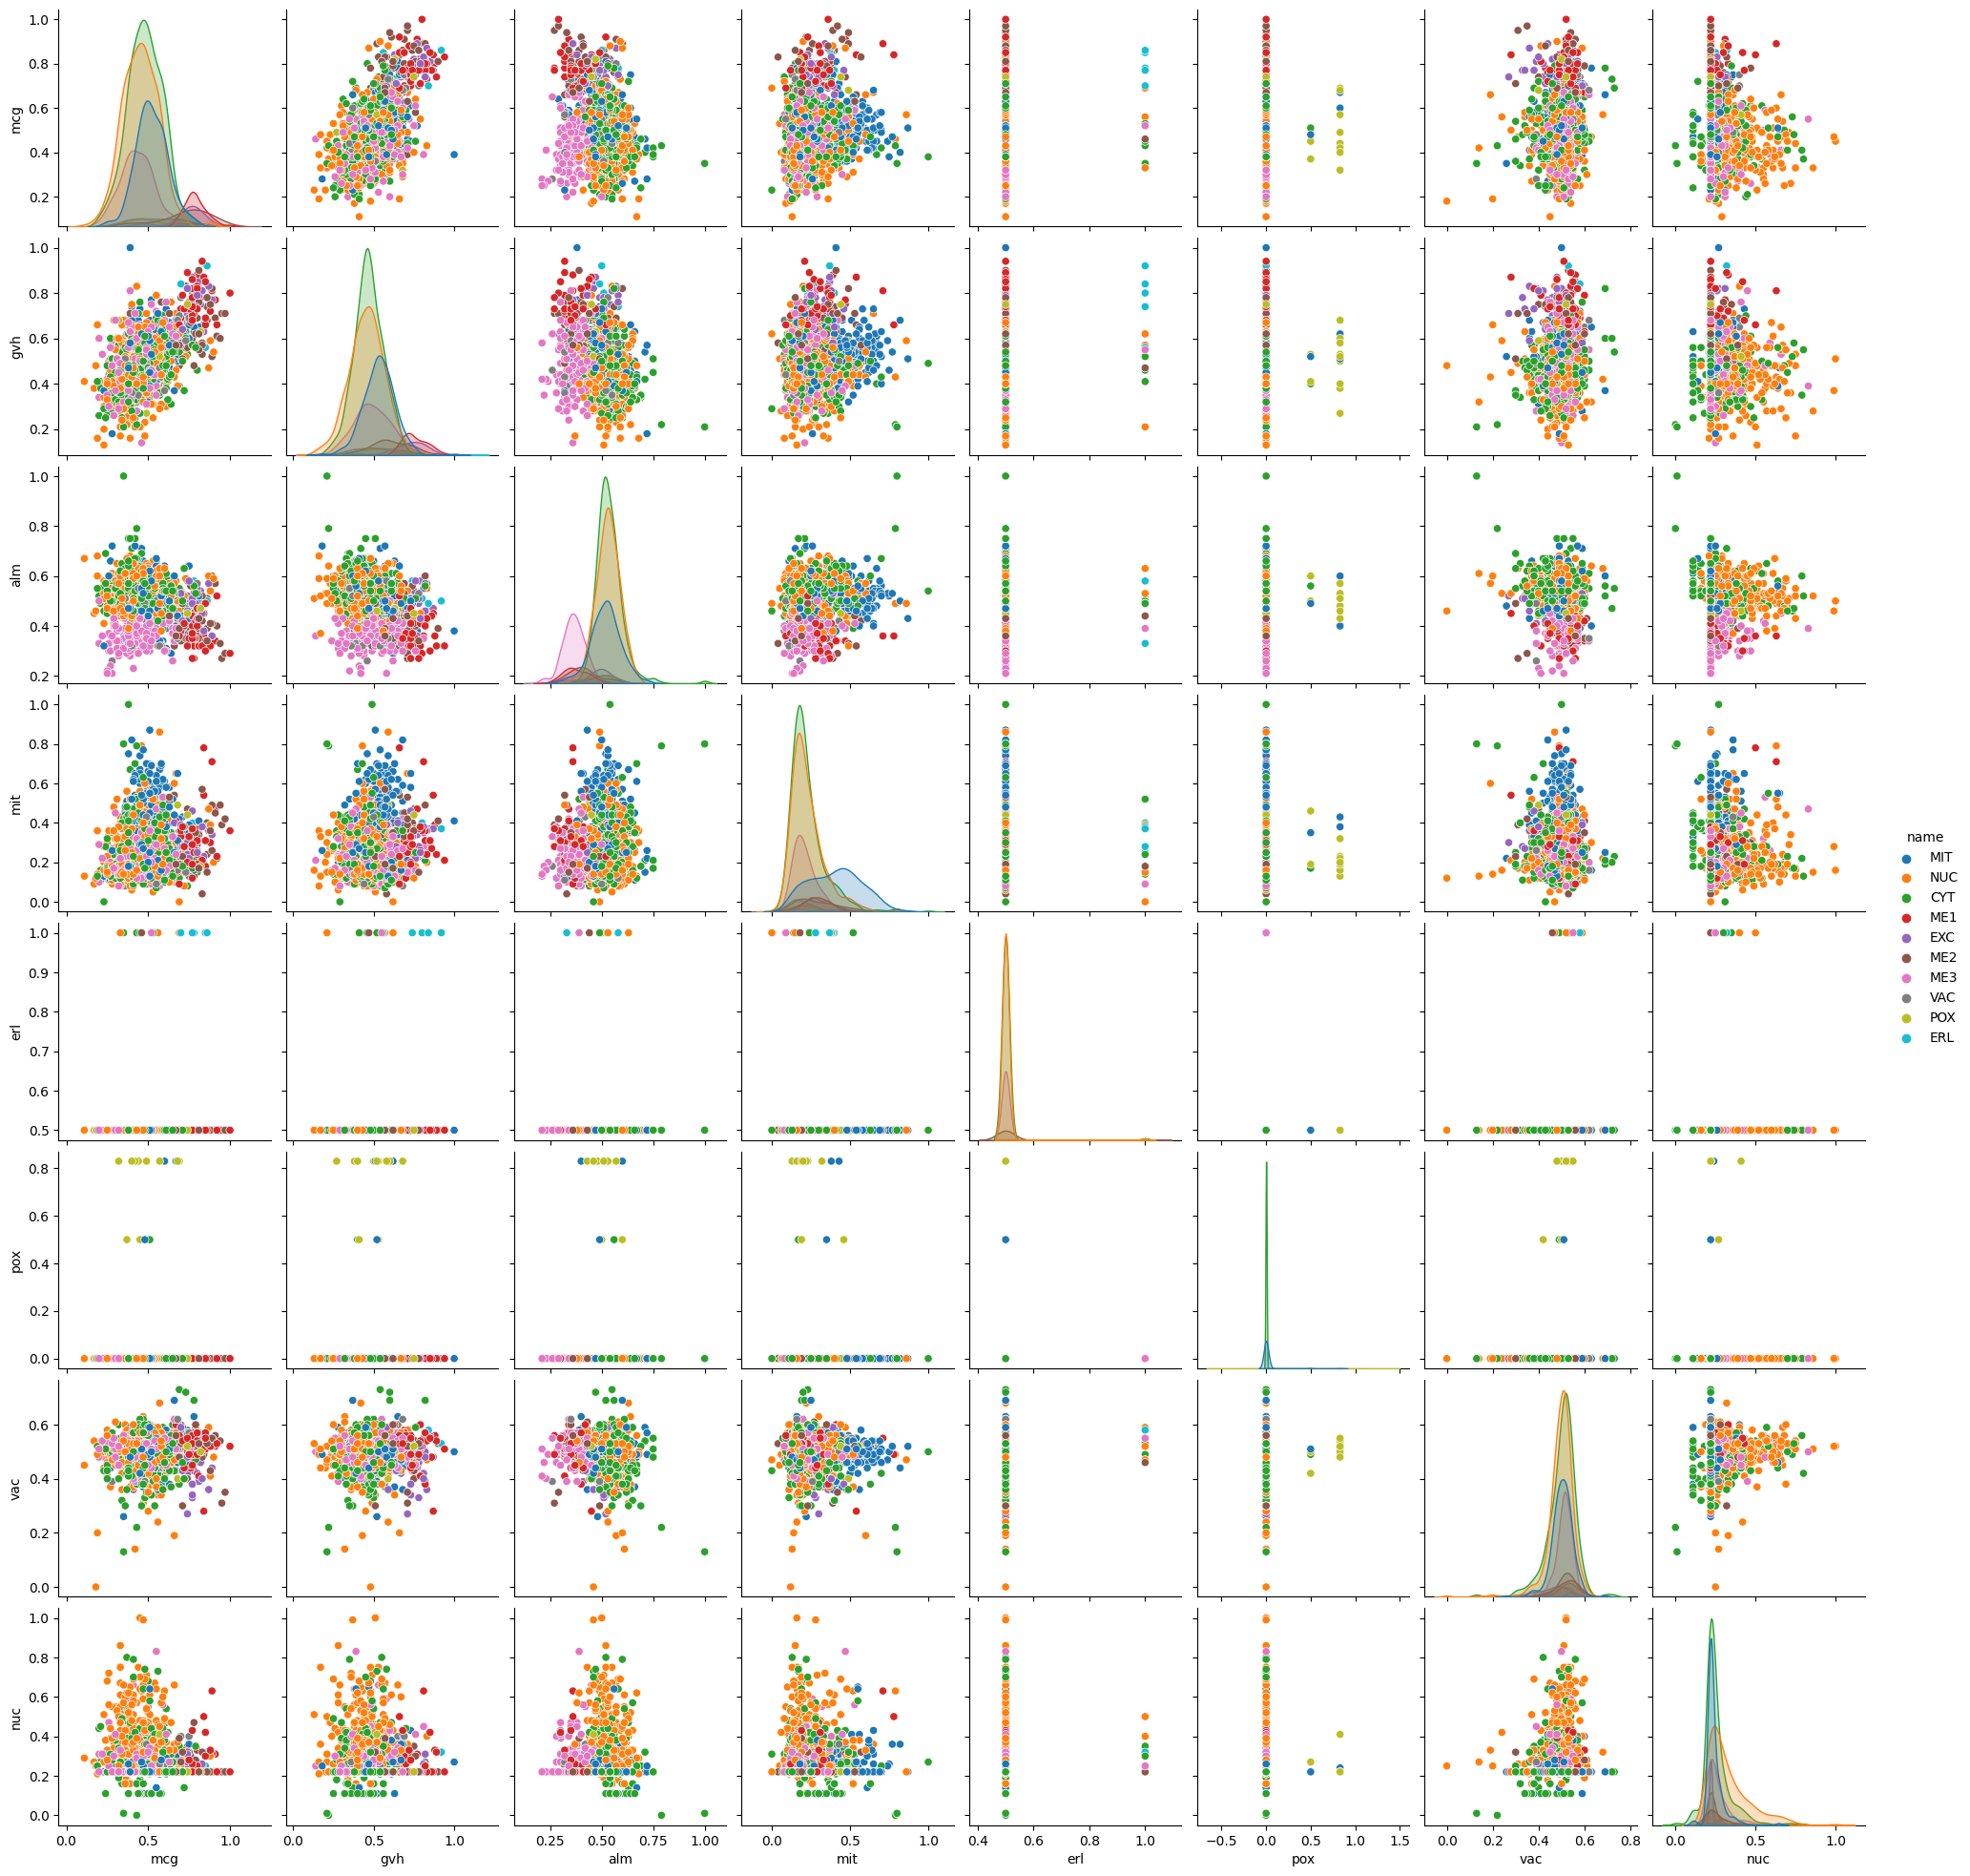

In [5]:
sns.pairplot(df, hue = 'name')

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [64]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('name', axis=1), df["name"], test_size=0.2, stratify = df['name'])

In [67]:
model = LogisticRegression(penalty = 'l2', max_iter=200, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [52]:
model.feature_names_in_, model.coef_

(array(['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc'],
       dtype=object),
 array([[-1.92814329e+00, -2.51837040e+00,  5.00004742e+00,
         -2.01374668e+00, -1.51366593e-01, -1.21300747e+00,
         -1.25226634e-01, -8.70234037e-01],
        [ 8.51130353e-01,  8.39289881e-01, -7.82094113e-02,
          3.20317748e-01,  1.92375668e+00, -3.65085402e-02,
          1.71236983e-01, -3.41470015e-02],
        [ 2.57723389e+00,  2.57250800e+00,  5.66882613e-01,
          2.78130622e-01, -2.64361092e-01, -1.87548292e-01,
         -1.04033171e+00, -7.69038275e-01],
        [ 3.65248134e+00,  3.58831695e+00, -2.12647997e+00,
          5.02652783e-01, -4.53033165e-01, -2.03395103e-01,
          1.33026846e-01,  2.53456510e-01],
        [ 3.59363901e+00,  1.38845449e-01, -1.64082303e+00,
          1.29082220e-01,  9.34437988e-02, -2.79263846e-01,
          2.61369560e-01, -4.17444319e-01],
        [-4.11279149e+00, -1.02664572e+00, -7.95870766e+00,
         -1.51663795e+00,  2.3153

In [68]:
#Analisando algumas métricas do modelo
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

met_accuracy = accuracy_score(y_test, y_pred)
#met_auc = roc_auc_score(y_test, y_pred)
#met_f1 = f1_score(y_test, y_pred, average='micro')

#print(f"Acurácia: {met_accuracy} \nROC AUC: 00 \nF1 Score: {met_f1}")
print(f"Acurácia: {met_accuracy}")

Acurácia: 0.5589225589225589


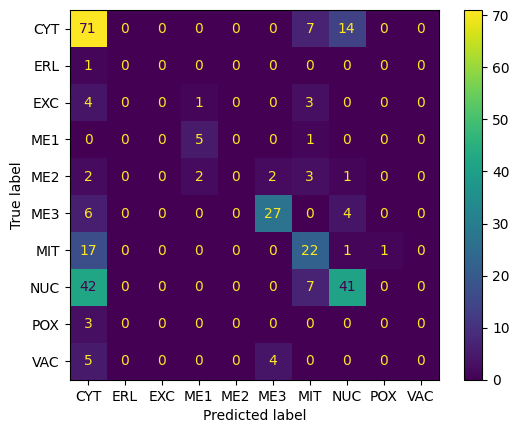

In [18]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_ )
ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_).plot()

In [70]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         CYT       0.77      0.48      0.59       150
         ERL       0.00      0.00      0.00         0
         EXC       0.00      0.00      0.00         0
         ME1       0.33      0.43      0.38         7
         ME2       0.00      0.00      0.00         0
         ME3       0.66      0.78      0.71        27
         MIT       0.49      0.62      0.55        39
         NUC       0.52      0.62      0.57        73
         POX       0.25      1.00      0.40         1
         VAC       0.00      0.00      0.00         0

    accuracy                           0.56       297
   macro avg       0.30      0.39      0.32       297
weighted avg       0.65      0.56      0.58       297



c:\Users\ferna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ferna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ferna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

Ideias para tentar no futuro, under/over sampling, considerando que há um grande desbalanceamento entre as classes